In [412]:
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error

In [416]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [415]:
def test_predictions(X_test,y_test,model):
    test_predictions = model.predict(X_test).flatten()
    #test_results = pd.DataFrame(data={'test Predictions':test_predictions, 'Actuals':y_test})
    error = mean_absolute_percentage_error(y_test, test_predictions)*100
    print(error)
    
    plt.plot(test_predictions)
    plt.plot(y_test)
    plt.legend(['test','Actual'])

In [ ]:
def df_to_X_y(df, window_size=10):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [421]:
def create_model_conv(stock = 'MSFT',duration = 'max',window = 10):
    company = yf.Ticker(stock)
    df = company.history(period=duration)
    df_open = df['Open']
    
    X, y = df_to_X_y(df_open, window)
    X_train, y_train = X[:int(len(X)*0.7)],y[:int(len(X)*0.7)]
    X_val, y_val = X[int(len(X)*0.7):int(len(X)*0.85)],y[int(len(X)*0.7):int(len(X)*0.85)]
    X_train, y_train = X[int(len(X)*0.85):],y[int(len(X)*0.85):]
    
    print(X.shape)
    
#     model = Sequential()
#     model.add(InputLayer((WINDOW_SIZE, 1)))
#     model.add(Conv1D(256,2))
#     model.add(Flatten())
#     model.add(Dense(16, 'relu'))
#     model.add(Dense(4, 'relu'))
#     model.add(Dense(1, 'linear'))
    
#     cp1 = ModelCheckpoint('model', save_best_only=True)
#     model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])
    
#     model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, callbacks=[cp1])
    
#     from tensorflow.keras.models import load_model
#     model = load_model('model/')
    
#     return(model)

In [422]:
model = create_model_conv()

(9383, 10, 1)


5/5 [==============================] - 0s 1ms/step
2.770882821615818


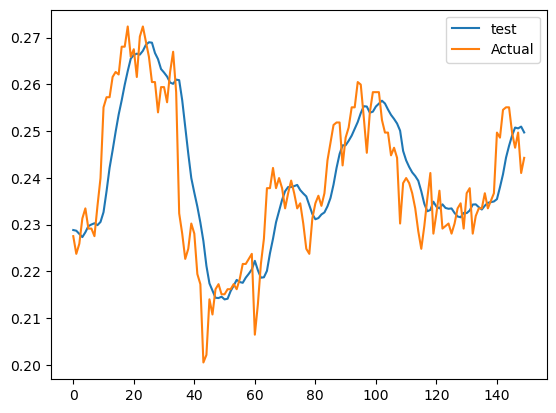

In [414]:
test_predictions(X_test,y_test,model)